#### Importing Packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import cv2
import albumentations as A
import os
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50

#### CNN based Feature Extractor with Classification Head (Sequential Model)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def CNN_Model(input_shape, num_classes):

    model = models.Sequential([
        # Feature Extraction Layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model


input_shape = (28, 28, 1)
num_classes = 10

model = CNN_Model(input_shape, num_classes)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,146 (543.54 KB)

 Trainable params: 138,826 (542.29 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
def prepare_mnist_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255

    # One-hot encode the labels
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = prepare_mnist_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(<matplotlib.image.AxesImage at 0x7c0d8f7ed610>,
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))

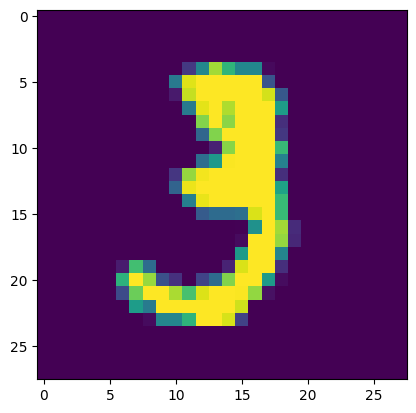

In [ ]:
plt.imshow(X_train[10]),y_train[10]

In [ ]:
X_train, X_test, y_train, y_test = prepare_mnist_data()

history = model.fit(X_train, y_train, epochs=2, batch_size=16, validation_data=(X_test, y_test),verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/2
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 141s 37ms/step - accuracy: 0.7692 - loss: 0.7355 - val_accuracy: 0.9856 - val_loss: 0.0539
Epoch 2/2
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 134s 36ms/step - accuracy: 0.9646 - loss: 0.1413 - val_accuracy: 0.9864 - val_loss: 0.0560

Test accuracy: 98.64%


#### CNN based Feature Extractor with Classification Head (Functional Model)

In [ ]:

def CNN_Model_Binary(input_shape, num_classes):

    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(num_classes, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (128, 128,3)
num_classes = 2

model = CNN_Model_Binary(input_shape, num_classes)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,585,410 (17.49 MB)

 Trainable params: 4,584,450 (17.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

#### Data Preprocess and Generator

In [ ]:
train_dir='C:/Users/MAHE/Documents/Mahesh/Images/Images/Image 1'
test_dir='C:/Users/MAHE/Documents/Mahesh/Images/Images/Image 2'


#Get labels for images
def get_label(image):
    if 'car'in image:
        return 0
    elif 'bus' in image:
        return 1

# Data generator function
def data_generator(train_dir, test_dir, target_size=(128, 128), batch_size=16, validation_split=0.1):

    def load_data(directory):
        image_paths = []
        labels = []
        for root, _, files in os.walk(directory):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.normpath(os.path.join(root, file))
                    image_paths.append(file_path)
                    labels.append(get_label(file))
        return image_paths, labels

    # Load data from train directory
    train_val_paths, train_val_labels = load_data(train_dir)

    # Split train+val into training and validation sets
    train_paths, val_paths, train_labels, val_labels = train_test_split(
        train_val_paths, train_val_labels, test_size=validation_split, stratify=train_val_labels, random_state=42
    )

    # Load test data
    test_paths, test_labels = load_data(test_dir)

    # Define Albumentations augmentations
    augmentation = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.4),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ])

    def generator(paths, labels, is_training):
        total_images = len(paths)
        while True:
            indices = np.arange(total_images)
            if is_training:
                np.random.shuffle(indices)

            for start in range(0, total_images, batch_size):
                end = min(start + batch_size, total_images)
                batch_indices = indices[start:end]

                batch_images = []
                batch_labels = []

                for i in batch_indices:
                    try:
                        # Load and preprocess the image
                        img = cv2.imread(paths[i], cv2.IMREAD_COLOR)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        img = cv2.resize(img, target_size)

                        # Apply augmentation for training
                        if is_training:
                            augmented = augmentation(image=img)
                            img = augmented['image']

                        # Normalize for all images
                        batch_images.append(img)
                        batch_labels.append(labels[i])
                    except Exception as e:
                        print(f"Error processing image {paths[i]}: {e}")
                        continue

                if not batch_images:
                    continue

                # Convert to numpy arrays and one-hot encode labels
                X = np.array(batch_images, dtype=np.float32)
                y = tf.keras.utils.to_categorical(batch_labels, num_classes=2)

                yield X, y

    # Create train, validation, and test generators
    train_gen = generator(train_paths, train_labels, is_training=True)
    val_gen = generator(val_paths, val_labels, is_training=False)
    test_gen = generator(test_paths, test_labels, is_training=False)

    return train_gen, val_gen, test_gen


# Usage
train_gen, val_gen, test_gen = data_generator(train_dir, test_dir, target_size=(128, 128), batch_size=16)


In [ ]:
history = model.fit(train_gen, epochs=2, steps_per_epoch=200//16,validation_data=val_gen, validation_steps=40) #callbacks=[early_stopping]

Epoch 1/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step - accuracy: 0.5822 - loss: 3.4129 - precision: 0.5683 - recall: 0.5960 - val_accuracy: 0.7500 - val_loss: 52.9146 - val_precision: 0.7500 - val_recall: 0.3000
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.6667 - loss: 2.0312 - precision: 0.6977 - recall: 0.6994 - val_accuracy: 0.5000 - val_loss: 249.1384 - val_precision: 0.5000 - val_recall: 0.5000


##### Model Evaluation

In [ ]:
steps = 100
evaluation = model.evaluate(test_gen,steps=steps)
print("\nTest Metrics:")
print(f"Loss: {evaluation[0]}")
print(f"Accuracy: {evaluation[1] * 100:.2f}%")

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.5396 - loss: 200.5075 - precision: 0.5396 - recall: 0.5396

Test Metrics:
Loss: 213.48782348632812
Accuracy: 51.12%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

# Build custom CNN model
def build_custom_cnn():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', name='conv1')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', name='conv2')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu', name='conv3')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

model = build_custom_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=3, validation_split=0.1)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 34ms/step - accuracy: 0.8934 - loss: 0.3380 - val_accuracy: 0.9870 - val_loss: 0.0449
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9858 - loss: 0.0444 - val_accuracy: 0.9902 - val_loss: 0.0350
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9890 - loss: 0.0334 - val_accuracy: 0.9917 - val_loss: 0.0307


In [ ]:
# --------------------------------------
# Extract and visualize intermediate feature maps
# --------------------------------------
def visualize_intermediate_output(img, layer_name):
    intermediate_layer_model = tf.keras.Model(inputs=model.input,
                                              outputs=model.get_layer(layer_name).output)
    feature_maps = intermediate_layer_model.predict(img[np.newaxis, ...])

    n_filters = feature_maps.shape[-1]
    size = feature_maps.shape[1]

    display_grid = np.zeros((size, size * n_filters))
    for i in range(n_filters):
        x = feature_maps[0, :, :, i]
        x -= x.mean()
        x /= (x.std() + 1e-5)
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size : (i + 1) * size] = x

    plt.figure(figsize=(20, 5))
    plt.title(f"Feature maps from layer: {layer_name}")
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()


# --------------------------------------
# Grad-CAM Implementation
# --------------------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = np.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-5)
    return heatmap.numpy()

def overlay_gradcam(img, heatmap, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    img_color = cv2.cvtColor((img * 255).astype("uint8"), cv2.COLOR_GRAY2BGR)
    superimposed_img = cv2.addWeighted(heatmap_color, alpha, img_color, 1 - alpha, 0)
    return superimposed_img

# Usage
def show_gradcam(img, layer_name='conv3'):
    heatmap = make_gradcam_heatmap(img[np.newaxis, ...], model, layer_name)
    gradcam = overlay_gradcam(img, heatmap)
    plt.imshow(gradcam)
    plt.title(f"Grad-CAM from {layer_name}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


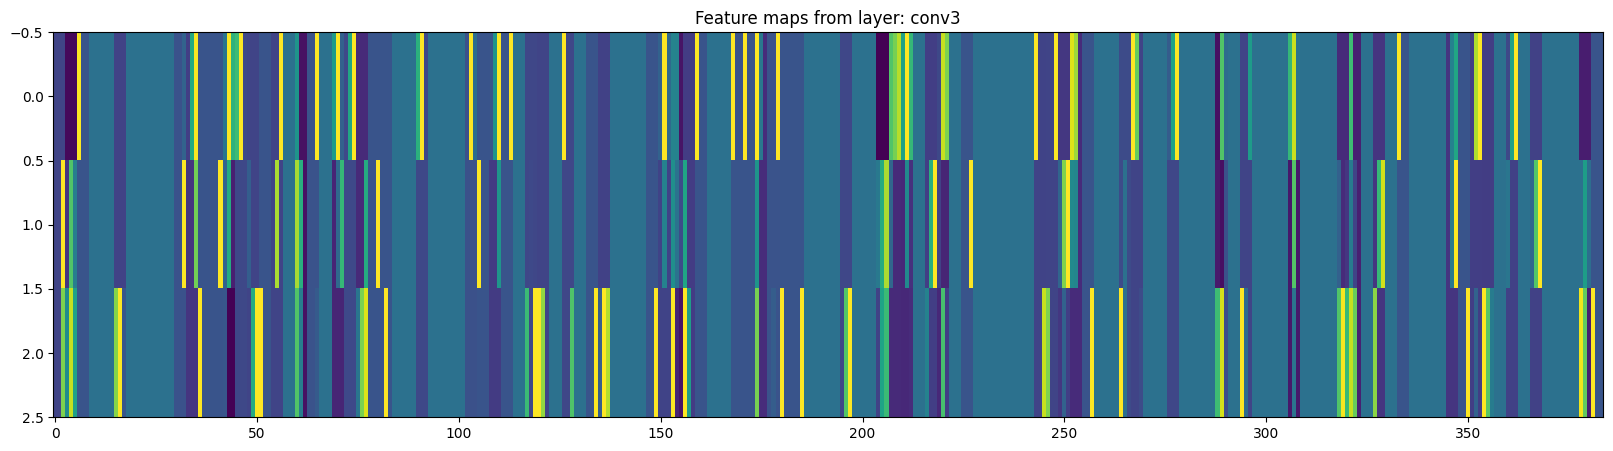

In [ ]:
img=X_train[0]
visualize_intermediate_output(img, 'conv3')

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_16']]
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


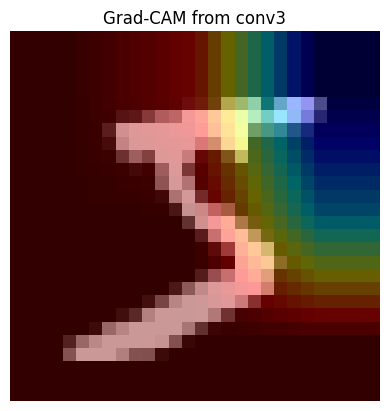

In [ ]:
show_gradcam(img, layer_name='conv3')

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_16']]
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


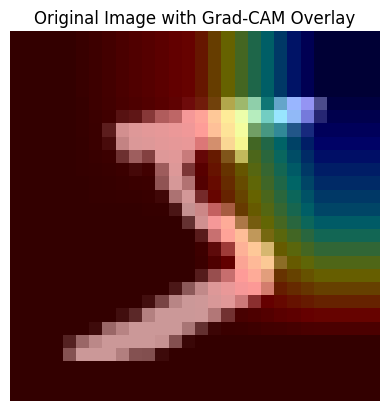

In [ ]:
manual_heatmap = make_gradcam_heatmap(img[np.newaxis, ...], model, 'conv3', pred_index=None)
gradcam_image = overlay_gradcam(img, manual_heatmap)
plt.imshow(gradcam_image)
plt.title("Original Image with Grad-CAM Overlay")
plt.axis('off')
plt.show()